## MVP or Nah?

In [41]:
#imports here!
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import warnings
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
warnings.filterwarnings('ignore')
from collections import Counter
from imblearn.over_sampling import SMOTE
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Introduction

This model can be built to appeal to various audiences. The motivation of creating this model can aid sports analysts in their predictions of MVP in the upcoming season, sport betters who want to bet on potential MVP for the upcoming NBA season, and even NBA players to see how well they need to play to become an All-Star. In the context of predicting the NBA MVP, the "positives" would be the player who is selected as MVP, and the "negatives" would be those who are not selected. Since the goal of our model is to predict the NBA MVP, we believe that those would utilize this model would prefer a model that would be better at classifying positive, or MVP, in this case. According to Sara Brown of MIT, "programmers choose a machine learning model to use, supply the data, and let the computer model train itself to find patterns or make predictions" (Machine Learning, explained, 2021). If this is the case would we prefer our model to be better at predicting the wrong outcome? Furthermore a potential user of this model can be a sports better, according to Neil Sahota, a professor at UC Irvine, "AI, with its unparalleled ability to analyze vast datasets and discern patterns beyond human capability, is emerging as the new MVP in this field" (The Game Changer: How AI Is Transforming The World Of Sports Gambling, 2024).

### Research Goal Statement

Our research goal is to build a predictive model that will effectively predict if an NBA player is the NBA MVP in new datasets.

### Secondary Research Goal Statement

Ideally, we would like for our chosen model to also yield reliable interpretative insights about the nature of the relationship between the variables in the dataset.

# Dataset Discussion

For this analysis, I will utilize a dataset sourced from Kaggle, renowned for its extensive collection of data utilized in research and analysis. This dataset encompasses detailed statistics pertinent to NBA MVP voting, including player performance metrics, team contributions, and historical voting outcomes. It serves as an invaluable resource for examining trends and patterns in MVP selections over the years. The Dataset is comprised by Robert Sunderhaft scraping four types of stats: the regular season stats, the advanced season stats, the team's stats, and the MVP voting stats. He joined and cleaned this data on a seperate python script. The code for the web scrapers will be posted on his github.The data set I am using is also posted on Kaggle.

# Data Source

The dataset was sourced from Kaggle and it can be accessed using the following think: https://www.kaggle.com/datasets/robertsunderhaft/nba-player-season-statistics-with-mvp-win-share the dataset was downloaded on 8/6/2024.

# Dataset Display

In [42]:
df = pd.read_csv('NBA_Dataset.csv')
df.fillna(0)

,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct
0,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,9.9,17.1,...,10.7,0.192,3.8,1.2,5.0,4.7,0.045,4.87,4.37,0.695
1,1982,Alvan Adams,C,27,PHO,79,75,30.3,6.4,13.0,...,7.2,0.144,1.4,2.2,3.6,3.4,0.000,3.45,3.05,0.561
2,1982,Mark Aguirre,SF,22,DAL,51,20,28.8,7.5,16.1,...,1.9,0.061,2.3,-1.6,0.7,1.0,0.000,-4.43,-4.48,0.341
3,1982,Danny Ainge,SG,22,BOS,53,1,10.6,1.5,4.2,...,0.5,0.042,-3.7,1.0,-2.7,-0.1,0.000,6.38,6.35,0.768
4,1982,Tiny Archibald,PG,33,BOS,68,51,31.9,4.5,9.6,...,5.2,0.115,1.4,-1.3,0.1,1.1,0.000,6.38,6.35,0.768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17692,2022,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,...,2.2,0.126,0.1,2.1,2.2,0.9,0.000,0.00,0.00,0.500
17693,2022,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,10.0,0.181,7.1,-2.0,5.2,4.8,0.000,1.56,1.55,0.524
17694,2022,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,2.1,0.145,-1.4,0.4,-1.0,0.2,0.000,4.45,4.23,0.646
17695,2022,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,1.1,0.143,-1.2,-1.0,-2.1,0.0,0.000,-8.88,-8.55,0.329


Now that we have our dataset in hand, it's time to strategize our approach to this project.

Our goal is to predict the NBA's Most Valuable Player (MVP), a decision determined through a Borda count voting system. In this system, votes are weighted differently depending on their rank: first-place votes earn 10 points, second place earns 7 points, third place garners 5 points, fourth place gets 3 points, and fifth place receives 1 point. The player accumulating the highest total points at the end of the voting process is named the MVP.

To forecast the MVP, we aim to predict the proportion of total voting points each player secures, referred to as the award share. This objective suggests that we should employ a supervised regression model for our predictions.

With our approach defined, let's dive into the data analysis.

# Features Engineering and Data Preprocessing

After data cleaning, it is crucial to start doing Feature Engineering. In this process we manipulate the data so it is the most informative and useful for our model to train on.

The first feature that I added to the data was a boolean value denoting which player won the MVP award that year. It is true for the player that won and false for the players that didn't win. This will allow us to easily check if our predictions were accurate will testing.

In [43]:
mvplist = df.groupby('season').max('award_share')
mvplist["mvp"] = True
data = df.merge(mvplist[["award_share", "mvp"]], on = ["season", "award_share"], how = "left")
data['mvp'] = data['mvp'].fillna(False)

In the process of feature engineering, our aim isn't solely to introduce new features but also to eliminate those that are redundant or contribute no additional insight. A preliminary exploratory data analysis (EDA) reveals that many statistics in the dataset are redundant, being calculable from combinations of other variables. For instance, fg_per_g can be calculated by multiplying fga_per_g with fg_pct, making fg_per_g redundant. This redundancy is evident from the perfect correlation of 1 between the derived statistic and fg_per_g, as illustrated in the accompanying graph. Therefore, we can safely remove fg_per_g from our dataset. This principle also applies to other variables such as fg3_per_g, fg2_per_g, ft_per_g, and trb_per_g.

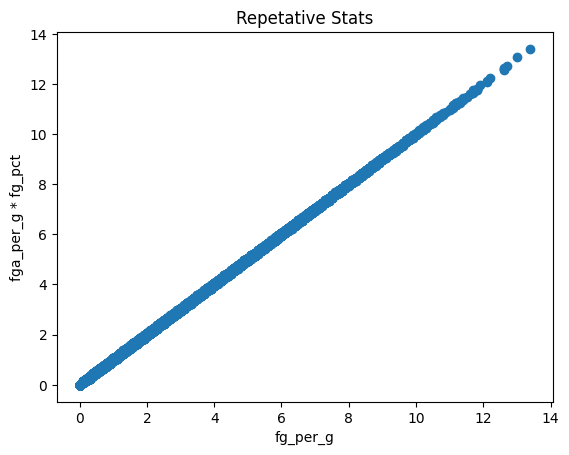

array([[ 1., nan],
       [nan, nan]])

In [44]:
plt.scatter(df["fg_per_g"], df["fga_per_g"]*df["fg_pct"])
plt.xlabel("fg_per_g")
plt.ylabel("fga_per_g * fg_pct")
plt.title("Repetative Stats")
plt.show()
np.corrcoef(df["fg_per_g"], df["fga_per_g"]*df["fg_pct"])


In [45]:
df = df.drop(columns = ["fg_per_g", "fg3_per_g", "fg2_per_g", "ft_per_g", "trb_per_g"], axis = 1)
df

,season,player,pos,age,team_id,g,gs,mp_per_g,fga_per_g,fg_pct,...,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct
0,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,17.1,0.579,...,10.7,0.192,3.8,1.2,5.0,4.7,0.045,4.87,4.37,0.695
1,1982,Alvan Adams,C,27,PHO,79,75,30.3,13.0,0.494,...,7.2,0.144,1.4,2.2,3.6,3.4,0.000,3.45,3.05,0.561
2,1982,Mark Aguirre,SF,22,DAL,51,20,28.8,16.1,0.465,...,1.9,0.061,2.3,-1.6,0.7,1.0,0.000,-4.43,-4.48,0.341
3,1982,Danny Ainge,SG,22,BOS,53,1,10.6,4.2,0.357,...,0.5,0.042,-3.7,1.0,-2.7,-0.1,0.000,6.38,6.35,0.768
4,1982,Tiny Archibald,PG,33,BOS,68,51,31.9,9.6,0.472,...,5.2,0.115,1.4,-1.3,0.1,1.1,0.000,6.38,6.35,0.768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17692,2022,Thaddeus Young,PF,33,TOT,52,1,16.3,5.2,0.518,...,2.2,0.126,0.1,2.1,2.2,0.9,0.000,0.00,0.00,0.500
17693,2022,Trae Young,PG,23,ATL,76,76,34.9,20.3,0.460,...,10.0,0.181,7.1,-2.0,5.2,4.8,0.000,1.56,1.55,0.524
17694,2022,Omer Yurtseven,C,23,MIA,56,12,12.6,4.4,0.526,...,2.1,0.145,-1.4,0.4,-1.0,0.2,0.000,4.45,4.23,0.646
17695,2022,Cody Zeller,C,29,POR,27,0,13.1,3.3,0.567,...,1.1,0.143,-1.2,-1.0,-2.1,0.0,0.000,-8.88,-8.55,0.329


# Representation Bias and Checking for Multicolinearity

A significant challenge in machine learning is dealing with biased datasets, one form of which is representation bias. This type of bias occurs when the data used to train a model does not accurately reflect the broader population data. This is a simplified explanation of a complex issue, and Robert Sunderhaft suggests delving deeper into this topic through a detailed article by Mary Reagan. 

Here is a summary:


AI often makes headlines for issues related to bias and fairness, notably in areas like facial recognition and healthcare. Bias can manifest in various forms throughout the data handling and model development processes, from historical biases in data to biases introduced during modeling and human review. Fairness, conversely, involves ensuring no prejudice against any group or individual based on inherent characteristics. Strategies to improve fairness include calibrating predictions for each group and potentially designing separate models for different demographics to prevent both group and individual biases. This is a crucial area of focus for many industries, particularly those under strict regulations.

Regarding our dataset, it's important to note that the current format for MVP voting in the NBA began with the 1981-82 season.

In [46]:
df = df[df["season"] > 1981]
len(df)

17697

In [47]:
dfTestSet = df[df["season"] == 2022]
df =  df[df["season"] < 2022]

## Making an MVP Column

Including the is_mvp binary column in a correlation matrix within an NBA dataset is crucial for several reasons. It helps identify key statistics that correlate with MVP selection, aiding in feature selection for predictive models aimed at forecasting future MVPs. This analysis not only enhances model accuracy by pinpointing relevant features but also provides deeper insights into the nuanced aspects of player performance that contribute to earning MVP status. Additionally, examining these correlations can help validate data integrity and reveal historical trends in MVP criteria, offering a comprehensive view of how definitions of value and performance in the league may have evolved.

In [48]:
mvps_updated = {
    2023: ["Joel Embiid"], 2022: ["Nikola Jokić"], 2021: ["Nikola Jokić"],
    2020: ["Giannis Antetokounmpo"], 2019: ["Giannis Antetokounmpo"],
    2018: ["James Harden"], 2017: ["Russell Westbrook"], 2016: ["Stephen Curry"],
    2015: ["Stephen Curry"], 2014: ["Kevin Durant"], 2013: ["LeBron James"],
    2012: ["LeBron James"], 2011: ["Derrick Rose"], 2010: ["LeBron James"],
    2009: ["LeBron James"], 2008: ["Kobe Bryant"], 2007: ["Dirk Nowitzki"],
    2006: ["Steve Nash"], 2005: ["Steve Nash"], 2004: ["Kevin Garnett"],
    2003: ["Tim Duncan"], 2002: ["Tim Duncan"], 2001: ["Allen Iverson"],
    2000: ["Shaquille O'Neal"], 1999: ["Karl Malone"], 1998: ["Michael Jordan"],
    1997: ["Karl Malone"], 1996: ["Michael Jordan"], 1995: ["David Robinson"],
    1994: ["Hakeem Olajuwon"], 1993: ["Charles Barkley"], 1992: ["Michael Jordan"],
    1991: ["Michael Jordan"], 1990: ["Magic Johnson"], 1989: ["Magic Johnson"],
    1988: ["Michael Jordan"], 1987: ["Magic Johnson"], 1986: ["Larry Bird"],
    1985: ["Larry Bird"], 1984: ["Larry Bird"], 1983: ["Moses Malone"],
    1982: ["Moses Malone"]
}

df['is_mvp'] = df.apply(lambda row: 1 if row['player'] in mvps_updated.get(row['season'], []) else 0, axis=1)

df


,season,player,pos,age,team_id,g,gs,mp_per_g,fga_per_g,fg_pct,...,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct,is_mvp
0,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,17.1,0.579,...,0.192,3.8,1.2,5.0,4.7,0.045,4.87,4.37,0.695,0
1,1982,Alvan Adams,C,27,PHO,79,75,30.3,13.0,0.494,...,0.144,1.4,2.2,3.6,3.4,0.000,3.45,3.05,0.561,0
2,1982,Mark Aguirre,SF,22,DAL,51,20,28.8,16.1,0.465,...,0.061,2.3,-1.6,0.7,1.0,0.000,-4.43,-4.48,0.341,0
3,1982,Danny Ainge,SG,22,BOS,53,1,10.6,4.2,0.357,...,0.042,-3.7,1.0,-2.7,-0.1,0.000,6.38,6.35,0.768,0
4,1982,Tiny Archibald,PG,33,BOS,68,51,31.9,9.6,0.472,...,0.115,1.4,-1.3,0.1,1.1,0.000,6.38,6.35,0.768,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17087,2021,Delon Wright,SG-PG,28,TOT,63,39,27.7,8.2,0.463,...,0.117,0.6,1.5,2.2,1.8,0.000,0.00,0.00,0.500,0
17088,2021,Thaddeus Young,PF,32,CHI,68,23,24.3,9.7,0.559,...,0.147,1.9,1.4,3.3,2.2,0.000,-0.89,-0.94,0.431,0
17089,2021,Trae Young,PG,22,ATL,63,63,33.7,17.7,0.438,...,0.163,5.3,-1.7,3.7,3.0,0.000,2.32,2.14,0.569,0
17090,2021,Cody Zeller,C,28,CHO,48,21,20.9,6.8,0.559,...,0.156,-0.2,-0.2,-0.5,0.4,0.000,-1.93,-1.94,0.458,0


Perfect! Now let's check if we have all the correct mvps for seasons since 1982!

In [49]:
# Extracting players who are marked as MVPs
marked_mvps =df[df['is_mvp'] == 1][['season', 'player']]
marked_mvps.sort_values('season', inplace=True)
# Creating a DataFrame from the MVP dictionary
expected_mvps = pd.DataFrame(list(mvps_updated.items()), columns=['season', 'player'])
# Merging the DataFrames on season to compare expected and marked MVPs
comparison_df = pd.merge(expected_mvps, marked_mvps, on='season', suffixes=('_expected', '_marked'))

comparison_df

,season,player_expected,player_marked
0,2021,[Nikola Jokić],Nikola Jokić
1,2020,[Giannis Antetokounmpo],Giannis Antetokounmpo
2,2019,[Giannis Antetokounmpo],Giannis Antetokounmpo
3,2018,[James Harden],James Harden
4,2017,[Russell Westbrook],Russell Westbrook
5,2016,[Stephen Curry],Stephen Curry
6,2015,[Stephen Curry],Stephen Curry
7,2014,[Kevin Durant],Kevin Durant
8,2013,[LeBron James],LeBron James
9,2012,[LeBron James],LeBron James


Making a correlation matrix 

In [50]:
column = df.columns
column

Index(['season', 'player', 'pos', 'age', 'team_id', 'g', 'gs', 'mp_per_g',
       'fga_per_g', 'fg_pct', 'fg3a_per_g', 'fg3_pct', 'fg2a_per_g', 'fg2_pct',
       'efg_pct', 'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'ast_per_g',
       'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g', 'pts_per_g', 'mp',
       'per', 'ts_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'orb_pct',
       'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct',
       'usg_pct', 'ows', 'dws', 'ws', 'ws_per_48', 'obpm', 'dbpm', 'bpm',
       'vorp', 'award_share', 'mov', 'mov_adj', 'win_loss_pct', 'is_mvp'],
      dtype='object')

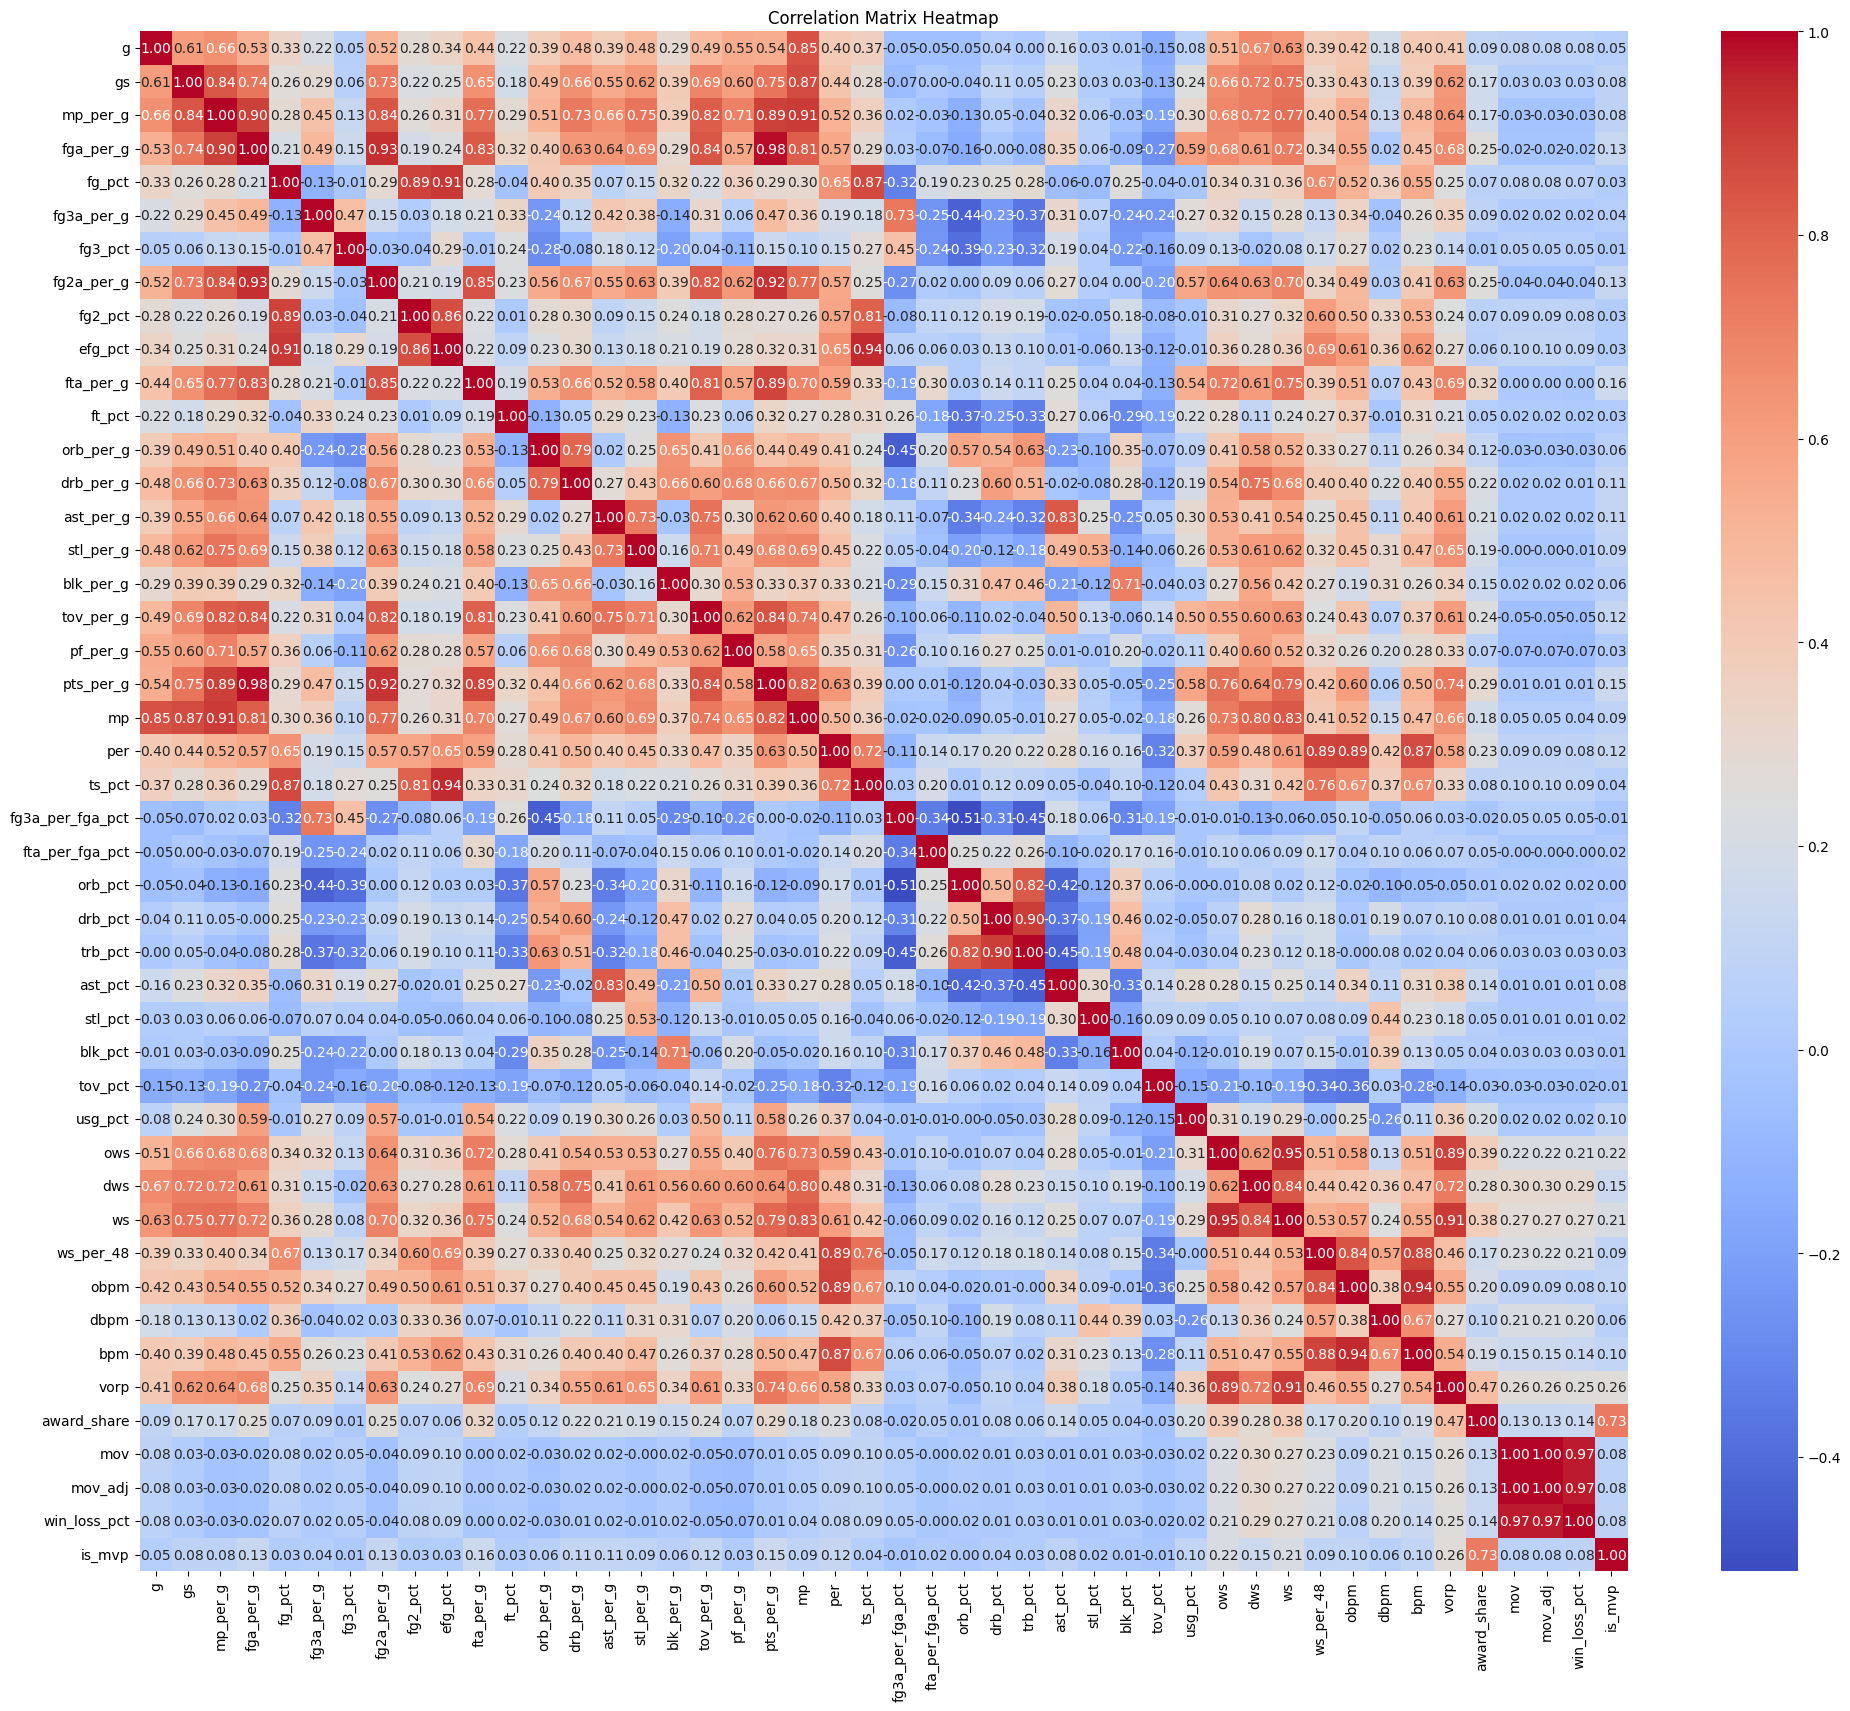

In [51]:

numeric_columns = numeric_columns = [ 'g', 'gs', 'mp_per_g',
       'fga_per_g', 'fg_pct', 'fg3a_per_g', 'fg3_pct', 'fg2a_per_g', 'fg2_pct',
       'efg_pct', 'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'ast_per_g',
       'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g', 'pts_per_g', 'mp',
       'per', 'ts_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'orb_pct',
       'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct',
       'usg_pct', 'ows', 'dws', 'ws', 'ws_per_48', 'obpm', 'dbpm', 'bpm',
       'vorp', 'award_share', 'mov', 'mov_adj', 'win_loss_pct', 'is_mvp']
nba_data_numeric =df[numeric_columns]

# Computing the correlation matrix
correlation_matrix_extended = nba_data_numeric.corr()

# Displaying the correlation matrix
correlation_matrix_extended

correlation_matrix_extended = nba_data_numeric.corr()

# Plotting the heatmap
plt.figure(figsize=(24, 20))  # Size of the figure
sns.heatmap(correlation_matrix_extended, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In an NBA dataset, keeping variables despite multicollinearity is crucial for comprehensive analysis and decision-making. While multicollinearity can complicate the interpretation of individual predictors, it does not undermine the model’s overall predictive power. Retaining all relevant variables allows for a holistic view of player performances, capturing various dimensions that inform different qualities, such as offensive efficiency and overall impact. Advanced metrics derived from these variables are essential for nuanced evaluations and strategic decisions in basketball analytics. Modern statistical techniques like PCA and regularization methods can manage multicollinearity effectively, ensuring that the richness and complexity of the data are maintained to support informed decision-making without oversimplifying the intricate dynamics of the game.

# Dealing with Imbalanced Data

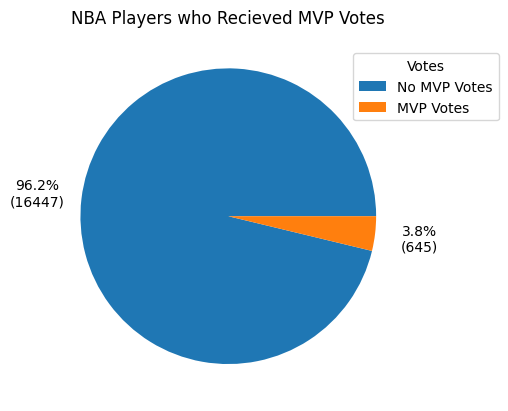

In [52]:
from collections import Counter

classes = df["award_share"] > 0
infoDf = df[["player", "pos", "team_id"]]
dataDf = df.drop(["player", "pos", "team_id"], axis = 1)

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(classes.value_counts(), 
       autopct = lambda pct: func(pct, classes.value_counts()),
       pctdistance = 1.3)

ax.set_title("NBA Players who Recieved MVP Votes")
ax.legend(["No MVP Votes", "MVP Votes"],
          title="Votes",
          loc = 'center right',
           bbox_to_anchor=(1.25, 0.85))

plt.show()


Random undersampling is a common method for balancing datasets, where a subset of data from the majority class is randomly removed. While this can be effective, it risks eliminating players with potentially valuable statistics and retaining others with redundant, less informative data. A more targeted approach involves strategically removing players who are less likely to receive MVP votes, such as those with minimal scoring, limited game starts, or reduced playtime. Historical data supports this strategy: the least number of games started by an MVP, Karl Malone, was 49 during the 1998-1999 season—a controversial MVP decision. Analyzing the distribution of games started among MVP contenders suggests a competitive benchmark: starting at least 20 games appears crucial for serious consideration in MVP voting.

In [53]:
mvpShares = df[df["award_share"] > 0]
nonMvpShares = df[df["award_share"] == 0]

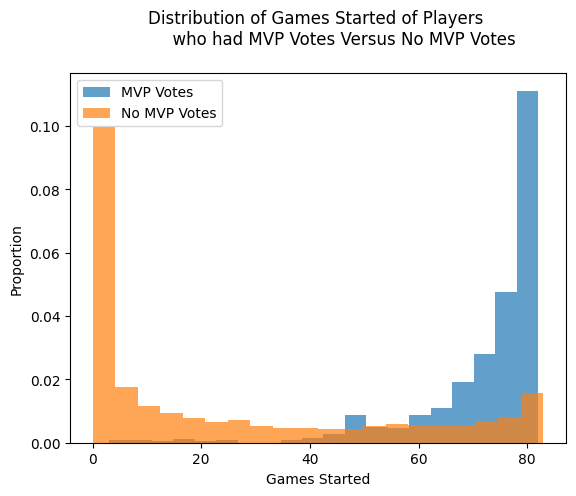

In [54]:
plt.hist(mvpShares["gs"], bins = 20, alpha = 0.7, density=True, label = "MVP Votes")
plt.hist(nonMvpShares["gs"], bins = 20, alpha = 0.7, density=True, label = "No MVP Votes")
plt.ylabel("Proportion")
plt.xlabel("Games Started")
plt.title("""Distribution of Games Started of Players 
          who had MVP Votes Versus No MVP Votes
          """)
plt.legend()
plt.show()

The bar chart displays the distribution of games started by NBA players and correlates this with the likelihood of receiving MVP votes. The chart is divided into two categories: players who received MVP votes (blue bars) and those who did not (orange bars). A stark contrast is observed in the data; players who start near the maximum games in a season (around 80) predominantly receive MVP votes, as depicted by the pronounced blue peak at higher games started. Conversely, the orange bars show a significant peak at zero games started, indicating that players who rarely start games seldom receive MVP votes. This pattern diminishes progressively as the number of games started increases, reinforcing the notion that consistent starting appearances are crucial for MVP consideration. The chart effectively illustrates that frequent starters are more likely to be MVP candidates, highlighting the importance of regular participation and performance in the league.

In [55]:
mvpShares[mvpShares["gs"] < 20][["season", "player", "g", "gs", "pts_per_g", 'award_share']].reset_index(drop = True)

,season,player,g,gs,pts_per_g,award_share
0,1982,Michael Cooper,76,14,11.9,0.004
1,1991,Kevin McHale,68,10,18.4,0.001
2,1992,Detlef Schrempf,80,4,17.3,0.001
3,1995,Michael Jordan,17,17,26.9,0.011
4,1996,Magic Johnson,32,9,14.6,0.007
5,1999,Darrell Armstrong,50,15,13.8,0.002
6,1999,Rasheed Wallace,49,18,12.8,0.001
7,2021,Derrick Rose,50,3,14.7,0.010


Before narrowing down the dataset, it's interesting to note some outliers concerning players who started fewer than 20 games yet received MVP votes. Initially, the first six players appeared to be typical outliers, receiving a few lower-ranking votes. However, two instances stand out significantly: Derrick Rose in the 2020-2021 season and Michael Jordan in the 1994-1995 season. Derrick Rose, despite only starting three games for the Detroit Pistons and New York Knicks and serving primarily as a role player, surprisingly received a first-place MVP vote. Maybe some voters thought there were glimpse of his 2011 MVP days. 

In contrast, Michael Jordan, during his comeback season in 1994-1995, played only 17 games after returning to the NBA just before the playoffs. While Jordan delivered solid performances, they weren't up to his usual standards. Nevertheless, he still managed to secure some MVP votes. These exceptions highlight the subjective nature of MVP voting, indicating that while player statistics are crucial, the overall sentiment and perception also significantly influence the outcomes. Despite these outliers, analyzing broader voting patterns allows for the identification of predictable trends in the MVP selection process.

In [56]:
df

,season,player,pos,age,team_id,g,gs,mp_per_g,fga_per_g,fg_pct,...,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct,is_mvp
0,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,17.1,0.579,...,0.192,3.8,1.2,5.0,4.7,0.045,4.87,4.37,0.695,0
1,1982,Alvan Adams,C,27,PHO,79,75,30.3,13.0,0.494,...,0.144,1.4,2.2,3.6,3.4,0.000,3.45,3.05,0.561,0
2,1982,Mark Aguirre,SF,22,DAL,51,20,28.8,16.1,0.465,...,0.061,2.3,-1.6,0.7,1.0,0.000,-4.43,-4.48,0.341,0
3,1982,Danny Ainge,SG,22,BOS,53,1,10.6,4.2,0.357,...,0.042,-3.7,1.0,-2.7,-0.1,0.000,6.38,6.35,0.768,0
4,1982,Tiny Archibald,PG,33,BOS,68,51,31.9,9.6,0.472,...,0.115,1.4,-1.3,0.1,1.1,0.000,6.38,6.35,0.768,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17087,2021,Delon Wright,SG-PG,28,TOT,63,39,27.7,8.2,0.463,...,0.117,0.6,1.5,2.2,1.8,0.000,0.00,0.00,0.500,0
17088,2021,Thaddeus Young,PF,32,CHI,68,23,24.3,9.7,0.559,...,0.147,1.9,1.4,3.3,2.2,0.000,-0.89,-0.94,0.431,0
17089,2021,Trae Young,PG,22,ATL,63,63,33.7,17.7,0.438,...,0.163,5.3,-1.7,3.7,3.0,0.000,2.32,2.14,0.569,0
17090,2021,Cody Zeller,C,28,CHO,48,21,20.9,6.8,0.559,...,0.156,-0.2,-0.2,-0.5,0.4,0.000,-1.93,-1.94,0.458,0


In [57]:
df= df[df["gs"] > 20]
df 

,season,player,pos,age,team_id,g,gs,mp_per_g,fga_per_g,fg_pct,...,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct,is_mvp
0,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,17.1,0.579,...,0.192,3.8,1.2,5.0,4.7,0.045,4.87,4.37,0.695,0
1,1982,Alvan Adams,C,27,PHO,79,75,30.3,13.0,0.494,...,0.144,1.4,2.2,3.6,3.4,0.000,3.45,3.05,0.561,0
4,1982,Tiny Archibald,PG,33,BOS,68,51,31.9,9.6,0.472,...,0.115,1.4,-1.3,0.1,1.1,0.000,6.38,6.35,0.768,0
8,1982,Greg Ballard,SF,27,WSB,79,79,37.3,16.5,0.475,...,0.154,1.5,1.7,3.2,3.9,0.000,0.88,1.06,0.524,0
10,1982,Mike Bantom,SF,30,TOT,82,38,24.6,8.7,0.469,...,0.069,-2.0,-0.3,-2.3,-0.1,0.000,0.00,0.00,0.500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17087,2021,Delon Wright,SG-PG,28,TOT,63,39,27.7,8.2,0.463,...,0.117,0.6,1.5,2.2,1.8,0.000,0.00,0.00,0.500,0
17088,2021,Thaddeus Young,PF,32,CHI,68,23,24.3,9.7,0.559,...,0.147,1.9,1.4,3.3,2.2,0.000,-0.89,-0.94,0.431,0
17089,2021,Trae Young,PG,22,ATL,63,63,33.7,17.7,0.438,...,0.163,5.3,-1.7,3.7,3.0,0.000,2.32,2.14,0.569,0
17090,2021,Cody Zeller,C,28,CHO,48,21,20.9,6.8,0.559,...,0.156,-0.2,-0.2,-0.5,0.4,0.000,-1.93,-1.94,0.458,0


To qualify as an MVP candidate, significant on-court playing time is essential. Based on this principle, we can strategically exclude players with minimal playing time from our dataset, effectively undersampling the majority class and minimizing extraneous data. For determining a cutoff point, I'll calculate the third standard deviation below the average minutes played per game by players who garnered MVP votes. 

In [58]:
mvp_players = df[df['award_share'] > 0]

# Calculate mean and standard deviation of minutes played
mean_minutes = mvp_players['mp_per_g'].mean()
std_minutes = mvp_players['mp_per_g'].std()

# Display the mean and standard deviation
print("Mean minutes played:", mean_minutes)
print("Standard deviation of minutes played:", std_minutes)

Mean minutes played: 36.398430141287285
Standard deviation of minutes played: 2.8360156827937923


In [59]:
mean_minutes - (3* std_minutes)

27.890383092905907

Using three standard deviations from the mean as a cutoff in statistical analysis is a widely accepted practice because it encompasses about 99.7% of the data in a normal distribution, according to the empirical rule (also known as the 68-95-99.7 rule). This method is particularly useful for identifying outliers or extreme values in a dataset.



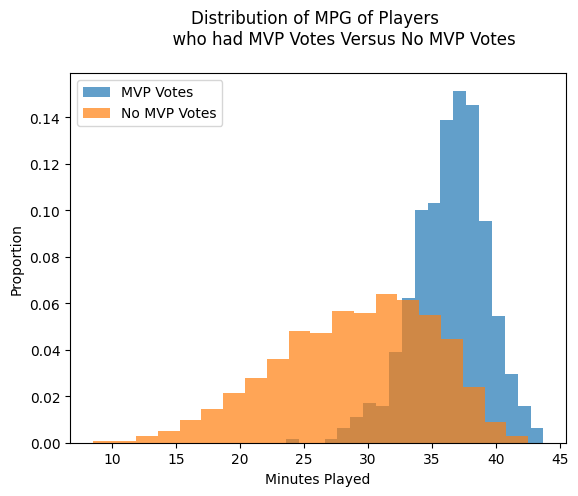

The cutoff is 27.890 minutes per game


In [60]:
mvpShares = df[df["award_share"] > 0]
nonMvpShares = df[df["award_share"] == 0]

plt.hist(mvpShares["mp_per_g"], bins = 20, alpha = 0.7, density=True, label = "MVP Votes")
plt.hist(nonMvpShares["mp_per_g"], bins = 20, alpha = 0.7, density=True, label = "No MVP Votes")
plt.ylabel("Proportion")
plt.xlabel("Minutes Played")
plt.title("""Distribution of MPG of Players 
          who had MVP Votes Versus No MVP Votes
          """)
plt.legend()
plt.show()

mp_cutoff = mvpShares["mp_per_g"].mean() - 3*mvpShares["mp_per_g"].std()
print(f"The cutoff is {mp_cutoff:.3f} minutes per game")

In [61]:
mvpShares[mvpShares["mp_per_g"] < mp_cutoff][["season", "player", "mp_per_g", "pts_per_g", 'award_share']].reset_index(drop = True)

,season,player,mp_per_g,pts_per_g,award_share
0,1983,Alton Lister,23.6,8.4,0.007
1,1999,Arvydas Sabonis,27.0,12.1,0.003


We can see here that the two players who received MVP votes that got removed were Alton Listen in 1983 and Arvydas Sabonis. Sabonis is considered a big what if regarding his time in the NBA. Sabonis joined the NBA late in his career primarily due to geopolitical circumstances and injuries. Born in 1964 in Soviet-controlled Lithuania, Sabonis was drafted by the Portland Trail Blazers in 1986 but didn't move to the NBA until 1995, after Lithuania gained independence in 1991. During the Cold War, the Soviet Union restricted its athletes from joining Western leagues, and Sabonis also needed to recover from numerous injuries. By the time international restrictions eased and he had proven his capabilities in Spain, Sabonis was already in his 30s. Despite the late start, he made a significant impact in the NBA, showcasing his exceptional skills as a center. Overall, 

Similarly, we can apply this reasoning to points scored in a game, as it logically follows that the league's best player would score a considerable number of points to merit MVP consideration. 








In [62]:
mvp_players_pts = df[df['pts_per_g'] > 0]

# Calculate mean and standard deviation of minutes played
mean_ppg = mvp_players['pts_per_g'].mean()
std_ppg = mvp_players['pts_per_g'].std()

# Display the mean and standard deviation
print("Mean Points per Game", mean_ppg)
print("Standard deviation of points per game:", std_ppg)

Mean Points per Game 22.32857142857143
Standard deviation of points per game: 5.078970702438282


Here, the established threshold for points scored per game was 7.109 points.

In [63]:
mean_ppg - (3 * std_ppg)

7.091659321256584

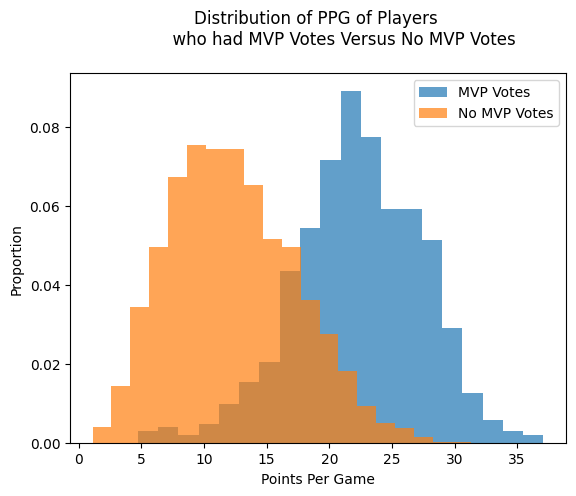

The cutoff is 7.092 points in a game


In [64]:
plt.hist(mvpShares["pts_per_g"], bins = 20, alpha = 0.7, density=True, label = "MVP Votes")
plt.hist(nonMvpShares["pts_per_g"], bins = 20, alpha = 0.7, density=True, label = "No MVP Votes")
plt.xlabel("Points Per Game")
plt.ylabel("Proportion")
plt.title("""Distribution of PPG of Players 
          who had MVP Votes Versus No MVP Votes
          """)
plt.legend()
plt.show()

pts_cutoff = mvpShares["pts_per_g"].mean() - 3 * mvpShares["pts_per_g"].std()
print(f"The cutoff is {pts_cutoff:.3f} points in a game")

In [65]:
mvpShares[mvpShares["pts_per_g"] < pts_cutoff][["season", "player", "pts_per_g", 'blk_per_g', 'orb_per_g', 'drb_per_g', 'award_share']].reset_index(drop = True)

,season,player,pts_per_g,blk_per_g,orb_per_g,drb_per_g,award_share
0,1989,Mark Eaton,6.2,3.8,2.8,7.5,0.004
1,1994,Dennis Rodman,4.7,0.4,5.7,11.6,0.001
2,1996,Dennis Rodman,5.5,0.4,5.6,9.3,0.004
3,2003,Ben Wallace,6.9,3.2,4.0,11.4,0.028


In this subset, we removed four players who received NBA MVP votes, primarily because they scored below the 7.109 points per game threshold. These players, typically centers and power forwards, excelled in defense and rebounding rather than scoring. Collectively, they have won eight Defensive Player of the Year awards, underscoring their value beyond just scoring. For instance, while players like Mark Eaton and Dennis Rodman received minimal MVP votes, Ben Wallace stood out with a significant win share, thanks to his stellar defense—he won Defensive Player of the Year—and leading the league in rebounds that season. Despite his strong performance, Wallace's low scoring average of 6.9 points per game was likely insufficient for garnering substantial MVP attention, a trend that holds even more in today's offensively focused NBA.

In [66]:
df = df[(df["pts_per_g"] > pts_cutoff) & (df["mp_per_g"] > mp_cutoff)].reset_index(drop = True)
df

,season,player,pos,age,team_id,g,gs,mp_per_g,fga_per_g,fg_pct,...,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct,is_mvp
0,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,17.1,0.579,...,0.192,3.8,1.2,5.0,4.7,0.045,4.87,4.37,0.695,0
1,1982,Alvan Adams,C,27,PHO,79,75,30.3,13.0,0.494,...,0.144,1.4,2.2,3.6,3.4,0.000,3.45,3.05,0.561,0
2,1982,Tiny Archibald,PG,33,BOS,68,51,31.9,9.6,0.472,...,0.115,1.4,-1.3,0.1,1.1,0.000,6.38,6.35,0.768,0
3,1982,Greg Ballard,SF,27,WSB,79,79,37.3,16.5,0.475,...,0.154,1.5,1.7,3.2,3.9,0.000,0.88,1.06,0.524,0
4,1982,Kent Benson,C,27,DET,75,72,32.9,10.7,0.505,...,0.101,0.0,0.4,0.4,1.5,0.000,-0.91,-0.63,0.476,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4468,2021,Andrew Wiggins,PF,25,GSW,71,71,33.3,14.9,0.477,...,0.080,0.0,-0.4,-0.4,1.0,0.000,1.06,1.10,0.542,0
4469,2021,Patrick Williams,PF,19,CHI,71,71,27.9,7.4,0.483,...,0.060,-2.8,0.4,-2.4,-0.2,0.000,-0.89,-0.94,0.431,0
4470,2021,Zion Williamson,PF,20,NOP,61,61,33.2,17.0,0.611,...,0.205,6.1,-0.3,5.8,4.0,0.000,-0.29,-0.20,0.431,0
4471,2021,Christian Wood,C,25,HOU,41,41,32.3,15.6,0.514,...,0.100,1.7,-0.3,1.4,1.1,0.000,-7.90,-7.50,0.236,0


In [67]:
7328 - 4596

2732

By creating this subsets, we managed to decrease the size of our dataset by approximately 2732 entries.

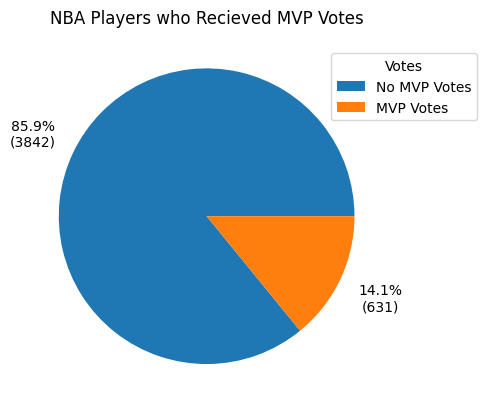

In [68]:

classes = df["award_share"] > 0

dataDf = df.drop(["player", "pos", "team_id", "is_mvp"], axis = 1)
unSmoteLen = len(dataDf)

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(classes.value_counts(), 
       autopct = lambda pct: func(pct, classes.value_counts()),
       pctdistance = 1.3)

ax.set_title("NBA Players who Recieved MVP Votes")

ax.legend(["No MVP Votes", "MVP Votes"],
          title="Votes",
          loc = 'center right',
           bbox_to_anchor=(1.25, 0.85))

plt.show()

In [69]:
dataDf.isnull().sum()

season                0
age                   0
g                     0
gs                    0
mp_per_g              0
fga_per_g             0
fg_pct                0
fg3a_per_g            0
fg3_pct             192
fg2a_per_g            0
fg2_pct               0
efg_pct               0
fta_per_g             0
ft_pct                0
orb_per_g             0
drb_per_g             0
ast_per_g             0
stl_per_g             0
blk_per_g             0
tov_per_g             0
pf_per_g              0
pts_per_g             0
mp                    0
per                   0
ts_pct                0
fg3a_per_fga_pct      0
fta_per_fga_pct       0
orb_pct               0
drb_pct               0
trb_pct               0
ast_pct               0
stl_pct               0
blk_pct               0
tov_pct               0
usg_pct               0
ows                   0
dws                   0
ws                    0
ws_per_48             0
obpm                  0
dbpm                  0
bpm             

In [70]:
dataDf['fg3_pct'].fillna(0, inplace=True)

Our dataset has improved, yet it remains significantly imbalanced with only 14.0% of players having received MVP votes. To address this imbalance, we can implement SMOTE, or Synthetic Minority Oversampling Technique. SMOTE helps by generating synthetic examples of the minority class, effectively balancing the dataset by increasing the presence of underrepresented data. The creator of this dataset Robert Sunderhaft recommended this article https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/. In this article was another highlighted work by Nitesh Chawla, Kevin Bowyer, Lawrence Hall,and W. Philip Kegelmeyer.

This article focuses on addressing the challenges posed by imbalanced datasets in classification tasks. It introduces SMOTE, a method that involves over-sampling the minority class by creating synthetic examples, rather than merely replicating existing ones. This technique helps in forming a more general decision boundary, which enhances model performance particularly under ROC curve analysis. The study demonstrates that combining SMOTE with under-sampling of the majority class outperforms traditional resampling methods or modifying class distributions alone. The effectiveness of SMOTE is evaluated across various datasets with different classifiers, showcasing its utility in improving sensitivity towards the minority class without losing predictive accuracy.

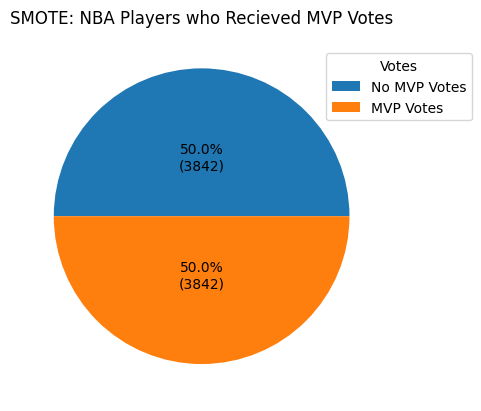

In [71]:
smote = SMOTE(sampling_strategy = 1)
dataDf, classes = smote.fit_resample(dataDf, classes)

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(classes.value_counts(), 
       autopct = lambda pct: func(pct, classes.value_counts()),
       pctdistance = 0.4)

ax.set_title("SMOTE: NBA Players who Recieved MVP Votes")

ax.legend(["No MVP Votes", "MVP Votes"],
          title="Votes",
          loc = 'center right',
           bbox_to_anchor=(1.25, 0.85))

plt.show()

We've successfully oversampled the minority class using SMOTE, which introduces a challenge: the synthetic data generated doesn't correspond to actual players or seasons. This complicates the process of determining the MVP, as the synthetic entries might skew the results by appearing statistically superior to real candidates. Fortunately, since SMOTE appends synthetic instances to the end of the dataset, we can straightforwardly identify and label these new data points, distinguishing them from the original data. This step is crucial for ensuring clarity in our analysis and maintaining the integrity of our MVP predictions.

In [72]:
dataDf["is_smote"] = dataDf.index >= unSmoteLen


In [73]:
labeledDataDf = dataDf.merge(df, how = "left")
labeledDataDf


,season,age,g,gs,mp_per_g,fga_per_g,fg_pct,fg3a_per_g,fg3_pct,fg2a_per_g,...,vorp,award_share,mov,mov_adj,win_loss_pct,is_smote,player,pos,team_id,is_mvp
0,1982,34,76,76,35.200000,17.100000,0.579000,0.000000,0.000000,17.100000,...,4.700000,0.045000,4.870000,4.370000,0.695000,False,Kareem Abdul-Jabbar,C,LAL,0.0
1,1982,27,79,75,30.300000,13.000000,0.494000,0.000000,0.000000,13.000000,...,3.400000,0.000000,3.450000,3.050000,0.561000,False,Alvan Adams,C,PHO,0.0
2,1982,33,68,51,31.900000,9.600000,0.472000,0.200000,0.375000,9.400000,...,1.100000,0.000000,6.380000,6.350000,0.768000,False,Tiny Archibald,PG,BOS,0.0
3,1982,27,79,79,37.300000,16.500000,0.475000,0.300000,0.409000,16.300000,...,3.900000,0.000000,0.880000,1.060000,0.524000,False,Greg Ballard,SF,WSB,0.0
4,1982,27,75,72,32.900000,10.700000,0.505000,0.100000,0.273000,10.500000,...,1.500000,0.000000,-0.910000,-0.630000,0.476000,False,Kent Benson,C,DET,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7679,2005,26,80,80,38.257214,19.428629,0.470853,3.528674,0.391136,15.885663,...,7.542697,0.372972,5.146728,5.000998,0.704130,True,NaN,NaN,NaN,NaN
7680,1992,24,71,68,36.052082,14.940216,0.529864,0.100000,0.080220,14.876041,...,5.680433,0.225615,4.663412,4.189236,0.608108,True,NaN,NaN,NaN,NaN
7681,1993,29,82,80,40.329484,9.233162,0.533545,1.155774,0.311840,8.077388,...,4.692871,0.130931,2.052948,2.118968,0.590455,True,NaN,NaN,NaN,NaN
7682,1995,26,81,81,36.881990,16.345340,0.498341,3.168957,0.308696,13.176383,...,5.240995,0.035963,7.735885,7.524645,0.691720,True,NaN,NaN,NaN,NaN


## Data Preprocessing 

Awesome, we've handled much of the preliminary data processing, but before we proceed with training our model, we need to divide it into training and testing sets.

An important point to note in the following code is the absence of data standardization. This step isn't necessary when working with tree-based models, as they don't require data standardization.

In [78]:
columns = ['age', 'g', 'gs', 'mp_per_g', 'fga_per_g', 'fg_pct',
 'fg2a_per_g', 'fg2_pct', 'efg_pct', 'fta_per_g', 'ft_pct', 'drb_per_g',
'ast_per_g', 'stl_per_g', 'tov_per_g', 'pf_per_g', 'pts_per_g', 'mp',
'per', 'ts_pct', 'fta_per_fga_pct', 'drb_pct', 'trb_pct', 'ast_pct',
'stl_pct', 'tov_pct', 'usg_pct', 'ows', 'dws', 'ws', 'ws_per_48',
'obpm', 'dbpm', 'bpm', 'vorp', 'mov', 'win_loss_pct']

In [74]:
dfTestSet = dfTestSet[(dfTestSet["gs"] > 20) & (dfTestSet["pts_per_g"] > pts_cutoff) & (dfTestSet["mp_per_g"] > mp_cutoff)].reset_index(drop = True)

In [80]:
modelDf = labeledDataDf.sample(frac=1).reset_index(drop = True)

# Train Data
trainInfo = modelDf[["season", "player", "pos", "team_id","award_share", "is_mvp", "is_smote"]]
trainData = modelDf[columns]
trainTargets = modelDf[["award_share"]]

# Test Data
testInfo = dfTestSet[["season", "player", "pos", "team_id", "award_share", "is_mvp"]]
testData = dfTestSet[columns]
testTargets = dfTestSet[["award_share"]]

KeyError: "['is_mvp'] not in index"

In [75]:
validation_scores = {"season" : [], "mae" : [], "was_mvp" : [], "was_top_two" : [], "was_top_three":[], "info" : []}
seasons = trainInfo.season.unique()
for season in seasons:
  print("\n")
  print(f"Season: {season}")

  trainFold = trainData[trainInfo["season"] != season]
  trainTarFold = trainTargets[trainInfo["season"] != season]
  valFold = trainData[(trainInfo["season"] == season) & (~trainInfo["is_smote"])]
  valTarFold = trainTargets[(trainInfo["season"] == season) & (~trainInfo["is_smote"])]
  valInfo = trainInfo[(trainInfo["season"] == season) & (~trainInfo["is_smote"])]

  regr = RandomForestRegressor(max_depth = 7, random_state=0)
  regr.fit(trainFold.to_numpy(), trainTarFold.to_numpy()[:,0])

  valPred = regr.predict(valFold)
  mae = np.mean(np.absolute(valPred - valTarFold.to_numpy()[:,0]))

  print(f"MAE: {mae}")

  topTwo = valInfo.iloc[np.argsort(valPred)[-2:]]
  was_top_two = sum(topTwo["was_mvp"]) > 0
  topThree = valInfo.iloc[np.argsort(valPred)[-3:]]
  was_top_three = sum(topThree["was_mvp"]) > 0
  print("Predicted top three players in MVP voting with their actual award_share:")
  print(topThree.iloc[::-1])

NameError: name 'trainInfo' is not defined